In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [3]:
# Data investigation
# defining a function that return the basic insight of dataset
def data_inv(df):
    print('netflix movies and shows: ',df.shape[0])
    print('dataset variables: ', df.shape[1])
    print('-'*10)
    print('dataset columns: \n',df.columns)
    print('-'*10)
    print('datatype of each column: \n',df.dtypes)
    print('*'*10)
    print('missing rows in the columns: \n')
    c = df.isnull().sum()
    print(c[c>0])
data_inv(df)

netflix movies and shows:  8807
dataset variables:  12
----------
dataset columns: 
 Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
----------
datatype of each column: 
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
**********
missing rows in the columns: 

director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


In [4]:
dups = df.duplicated(['title', 'country','type', 'release_year'])
df[dups]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [5]:
df = df.drop_duplicates(['title', 'country','type', 'release_year'])

In [6]:
df=df.drop('show_id', axis=1)

In [7]:
df['cast'] = df['cast'].replace(np.nan,'Unknown')
def cast_counter(cast):
    if cast == 'Unknown':
        return 0
    else:
        lst = cast.split(', ')
        length = len(lst)
        return length
df['number_of_cast'] = df['cast'].apply(cast_counter)
df['cast'] = df['cast'].replace('Unknown', np.nan)

In [8]:
df=df.reset_index()

In [9]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [10]:
df['date_added'] = df['date_added'].fillna('January 1, {}'.format(str(df['release_year'].mode()[0])))

In [11]:
for i in zip(df['country'].values, df.index):
    if i == np.nan:
        if ('Anime' in df.loc[j, 'listed_in']) or ('anime' in df.loc[j, 'listed_in']):
            df.loc[j, 'country'] = 'Japan'
        else:
            continue
    else:
        continue

In [12]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [13]:
import re
months = {
    'January':1, 
    'February':2, 
    'March':3, 
    'April':4, 
    'May':5,
    'June':6, 
    'July':7, 
    'August':8, 
    'September':9,
    'October':10, 
    'November':11,
    'December':12
}
date_list = []
for i in df['date_added'].values:
    str1=re.findall('([a-zA-Z]+)\s[0-9]+\,\s[0-9]+',i)
    str2=re.findall('[a-zA-Z]+\s([0-9]+)\,\s[0-9]+',i)
    str3=re.findall('[a-zA-Z]+\s[0-9]+\,\s([0-9]+)',i)
    date= '{}-{}-{}'.format(str3[0],months[str1[0]], str2[0])
    date_list.append(date)

In [14]:
df['date_added_cleaned'] = date_list

In [15]:
df = df.drop('date_added', axis=1)

In [16]:
df['dated_added_cleaned'] = df['date_added_cleaned'].astype('datetime64[ns]')

In [17]:
for i in df.index:
    if df.loc[i, 'rating'] == 'UR':
        df.loc[i, 'rating'] == 'NR'

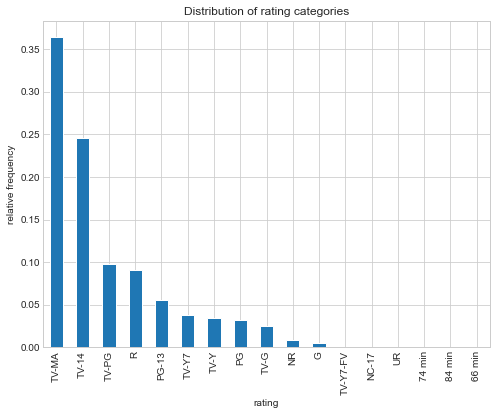

In [18]:
plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of rating categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

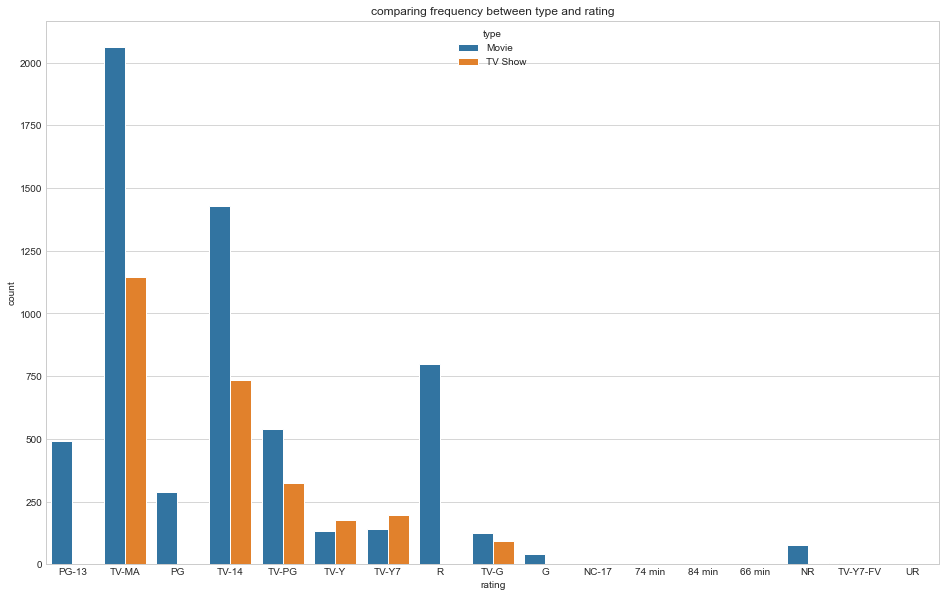

In [19]:
plt.figure(figsize=(16,10))
sns.countplot(x='rating', hue='type', data=df)
plt.title('comparing frequency between type and rating')
plt.show()

In [20]:
df['country'].value_counts().sort_values(ascending=False).head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

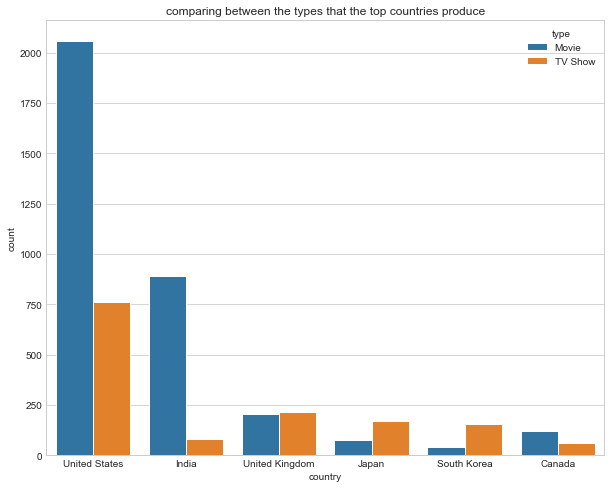

In [21]:
top_productive_countries = df[(df['country'] == 'United States') | (df['country'] == 'United Kingdom') | (df['country'] == 'India')
                             | (df['country'] == 'Japan') | (df['country'] == 'South Korea') | (df['country'] == 'Canada')]
plt.figure(figsize=(10,8))
sns.countplot(x='country', hue='type', data = top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

In [22]:
for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

United States
TV-MA       32.931157
R           15.613911
TV-14       14.407381
PG-13       10.255500
TV-PG        8.907026
PG           5.819730
TV-Y7        3.584102
TV-Y         3.087296
TV-G         2.909865
NR           1.242016
G            1.029099
74 min       0.035486
TV-Y7-FV     0.035486
84 min       0.035486
UR           0.035486
NC-17        0.035486
66 min       0.035486
Name: rating, dtype: float64
----------
India
TV-14       56.584362
TV-MA       25.514403
TV-PG       13.786008
TV-Y7        1.440329
TV-G         0.925926
TV-Y         0.514403
NR           0.411523
PG-13        0.411523
PG           0.205761
R            0.102881
TV-Y7-FV     0.102881
Name: rating, dtype: float64
----------
United Kingdom
TV-MA    42.243437
TV-PG    17.899761
TV-14    17.183771
R         7.875895
TV-G      5.489260
TV-Y      4.534606
PG-13     1.909308
TV-Y7     1.193317
NR        1.193317
PG        0.477327
Name: rating, dtype: float64
----------
Japan
TV-14    37.142857
TV-MA    35.91

In [23]:
df['year_added'] = df['dated_added_cleaned'].dt.year

In [24]:
df['type'].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [25]:
df.groupby('year_added')['type'].value_counts(normalize=True)

year_added  type   
2008        Movie      0.500000
            TV Show    0.500000
2009        Movie      1.000000
2010        Movie      1.000000
2011        Movie      1.000000
2012        Movie      1.000000
2013        Movie      0.545455
            TV Show    0.454545
2014        Movie      0.791667
            TV Show    0.208333
2015        Movie      0.682927
            TV Show    0.317073
2016        Movie      0.589744
            TV Show    0.410256
2017        Movie      0.706229
            TV Show    0.293771
2018        Movie      0.745630
            TV Show    0.254370
2019        Movie      0.706349
            TV Show    0.293651
2020        Movie      0.683342
            TV Show    0.316658
2021        Movie      0.662884
            TV Show    0.337116
Name: type, dtype: float64

In [26]:
dups = df.duplicated('title')
df[dups]['title']

Series([], Name: title, dtype: object)

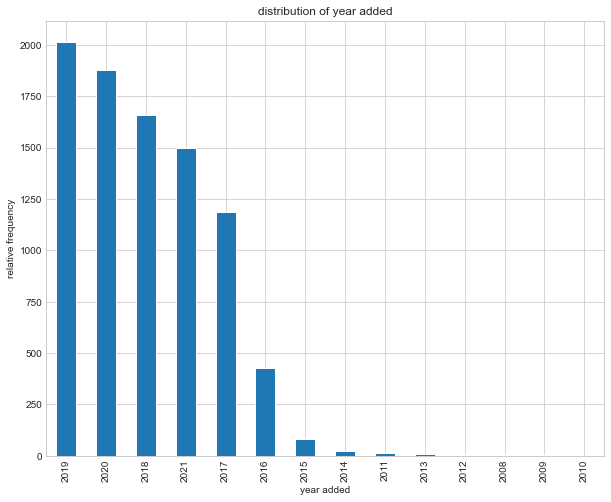

In [27]:
plt.figure(figsize=(10,8))
df['year_added'].value_counts().plot.bar()
plt.title('distribution of year added')
plt.ylabel('relative frequency')
plt.xlabel('year added')
plt.show()

In [28]:
counts=0
for i,j in zip(df['release_year'].values,df['year_added'].values):
    if i!=j:
        counts+=1
print('number of contents that its release year differ from the year added to netflix are ',str(counts))

number of contents that its release year differ from the year added to netflix are  5565


In [29]:
link = "https://www.kaggle.com/code/ezzaldin6/eda-of-netflix-contents/notebook"
print(link)

https://www.kaggle.com/code/ezzaldin6/eda-of-netflix-contents/notebook
